In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline


In [2]:
#make the path
path_test = r"C:\Users\Christopher\Default_Apps\Downloads\WineQuality-Red_Test.csv"
path_train = r"C:\Users\Christopher\Default_Apps\Downloads\WineQuality-Red_Train.csv"

#read in the data
df_test = pd.read_csv(path_test)
df_train = pd.read_csv(path_train)

In [3]:
#see the dataset
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.8,0.400,0.41,2.20,0.084,7.0,17.0,0.99840,3.08,0.67,9.3,Good
1,10.0,0.560,0.24,2.20,0.079,19.0,58.0,0.99910,3.18,0.56,10.1,Good
2,7.0,0.510,0.09,2.10,0.062,4.0,9.0,0.99584,3.35,0.54,10.5,Poor
3,8.8,0.610,0.30,2.80,0.088,17.0,46.0,0.99760,3.26,0.51,9.3,Poor
4,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,Poor


In [4]:
#look at the big picture
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1200 non-null   float64
 1   volatile acidity      1200 non-null   float64
 2   citric acid           1200 non-null   float64
 3   residual sugar        1200 non-null   float64
 4   chlorides             1200 non-null   float64
 5   free sulfur dioxide   1200 non-null   float64
 6   total sulfur dioxide  1200 non-null   float64
 7   density               1200 non-null   float64
 8   pH                    1200 non-null   float64
 9   sulphates             1200 non-null   float64
 10  alcohol               1200 non-null   float64
 11  quality               1200 non-null   object 
dtypes: float64(11), object(1)
memory usage: 112.6+ KB


In [5]:
#convert quality to 0 for good or 1 for bad
def binary_trans(data, df):
    le = LabelEncoder()
    binary_quality = le.fit_transform(data)
    df['quality'] = binary_quality
    return df

In [6]:
df_train = binary_trans(df_train['quality'], df_train)

In [7]:
#total count of each review
df_train['quality'].value_counts()

0    643
1    557
Name: quality, dtype: int64

In [8]:
df_test = binary_trans(df_test['quality'], df_test)

In [10]:
#Splitting data
X_train = df_train.drop('quality', axis=1)
y_train = df_train['quality']
X_test = df_test.drop('quality', axis=1)
y_test = df_test['quality']

In [11]:
#standardize data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [12]:
#build a loop to train different max depth for optimization
pred_data = []
for i in range(1,10):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    dtree = clf.fit(X_train, y_train)
    pred_clf = dtree.predict(X_test)
    pred_data.append(classification_report(y_test, pred_clf, output_dict = True))
    pred_array = np.asarray(pred_data)

In [38]:
y_data = []
x_data = range(1,9)
for i in range (1, 9):
    y_data.append(pred_array[i]['accuracy'])
    

Text(0, 0.5, 'Test Accuracy')

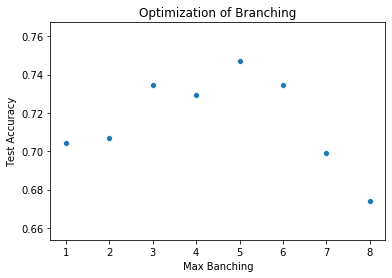

In [32]:
#visualize accuracy of decision tree over branching hyperparameters 
sns.scatterplot(x_data, y_data)
plt.title('Optimization of Branching')
plt.xlabel("Max Banching")
plt.ylabel("Test Accuracy")

In [35]:
#looks like max branching of 5 is the best, lets look closer
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
dtree = clf.fit(X_train, y_train)

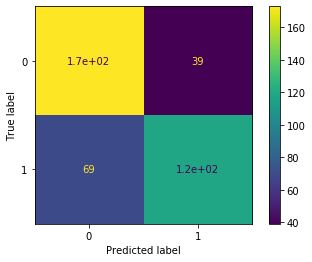

In [36]:
#confusion matrix with sklearn plot_confusion_matrix
plot_confusion_matrix(dtree, X_test, y_test)

In [37]:
#access the full data for branching of 5
pred_array[5]

{'0': {'precision': 0.7761194029850746,
  'recall': 0.7358490566037735,
  'f1-score': 0.7554479418886197,
  'support': 212},
 '1': {'precision': 0.7171717171717171,
  'recall': 0.7593582887700535,
  'f1-score': 0.7376623376623377,
  'support': 187},
 'accuracy': 0.7468671679197995,
 'macro avg': {'precision': 0.7466455600783959,
  'recall': 0.7476036726869135,
  'f1-score': 0.7465551397754787,
  'support': 399},
 'weighted avg': {'precision': 0.7484922920900926,
  'recall': 0.7468671679197995,
  'f1-score': 0.7471123328903372,
  'support': 399}}